In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# import weather data
weather_file = pd.read_csv("weather2018.csv")
weather_file = weather_file.rename(columns={"DATE": "Date", "AWND": "Average Wind Speed",
                                            "PRCP": "Precipitation", "SNOW": "Snow",
                                            "TAVG": "Average Temperate"})
#weather_file.head(1)

In [3]:
#use for loop merge MBTA data
total_OTP= pd.DataFrame({})
total_rider = ["Ontime_Performance_Peak_Offpeak_2018_01_Feb.csv",'Ontime_Performance_Peak_Offpeak_2018_02_Mar.csv',
        'Ontime_Performance_Peak_Offpeak_2018_03_Apr.csv','Ontime_Performance_Peak_Offpeak_2018_04_May.csv',
        'Ontime_Performance_Peak_Offpeak_2018_05_Jun.csv','Ontime_Performance_Peak_Offpeak_2018_06_Jul.csv',
        'Ontime_Performance_Peak_Offpeak_2018_07_Aug.csv','Ontime_Performance_Peak_Offpeak_2018_08_Sep.csv',
        'Ontime_Performance_Peak_Offpeak_2018_09_Oct.csv','Ontime_Performance_Peak_Offpeak_2018_10_Nov.csv',
        'Ontime_Performance_Peak_Offpeak_2018_11_Dec.csv','Ontime_Performance_Peak_Offpeak_2018_12_Jan.csv',]
for file in total_rider:
    tmp = pd.read_csv('OTP2018/' + file)
    total_OTP= total_OTP.append(tmp)
#total_OTP.head(400)

In [4]:
#Change name of Date column to merge
total_OTP = total_OTP.rename(columns={"service_date":"Date"})

In [5]:
#merge OTP with weather data
merge_OW= pd.merge(total_OTP,weather_file,on="Date",how="outer")
#merge_OW.head(10)

In [6]:
#Find and add Daily Accuracy for Each Line to The Data Frame
daily_ac=merge_OW["otp_numerator"] / merge_OW["otp_denominator"]
Clean_df= pd.DataFrame( {'Date':merge_OW['Date'],'Type':merge_OW['mode_type'],
           'On Time Ride':merge_OW['otp_numerator'], 'Total Ride':merge_OW['otp_denominator'],
           'Daily Accuracy':daily_ac, 'Snow':merge_OW['Snow'], 
           'Precipitation':merge_OW['Precipitation'], 'Temperature':merge_OW['Average Temperate'], 
           'Wind Speed':merge_OW['Average Wind Speed']
                        })
Clean_df=Clean_df.sort_values("Date",ascending=True)
#Clean_df.head(20)

In [7]:
#Sort The Data by Date 
Clean_df.sort_values(["Date"], ascending=[True],inplace=True)
#Clean_df.head()

In [8]:
#Create # different  Data Frame Bye the Transportation Type
Bus_OTP = Clean_df.loc[Clean_df['Type']=='Bus']
Com_rail_OTP = Clean_df.loc[Clean_df['Type']=='Commuter Rail']
Rail_OTP=Clean_df.loc[Clean_df['Type']=='Rail']

In [9]:
#Group All Sub Data by the Date
Bus_by_date= Bus_OTP.groupby(['Date'])
Com_by_date= Com_rail_OTP.groupby(['Date'])
Rail_by_date= Rail_OTP.groupby(['Date'])


In [10]:
#Find and add Daily Accuracy to The Data Frame which Grouped by Date for Bus
Bus_OTP_date =pd.DataFrame( {'On Time Ride':Bus_by_date['On Time Ride'].sum(), 
        'Total Ride':Bus_by_date['Total Ride'].sum(),
        'Daily Accuracy':Bus_by_date['On Time Ride'].sum()/Bus_by_date['Total Ride'].sum(),
        'Snow':Bus_by_date['Snow'].mean(), 'Precipitation':Bus_by_date['Precipitation'].mean(),
        'Temperature':Bus_by_date['Temperature'].mean(),
        'Wind Speed':Bus_by_date['Wind Speed'].mean()}).reset_index()
mean_bus=Bus_OTP_date['Daily Accuracy'].mean()
#Bus_OTP_date.head()
#Bus_OTP_date
#Bus_OTP_date.to_csv('Bus_yearly.csv')

In [11]:
#Find and add Daily Accuracy to The Data Frame which Grouped by Date for Commuter Rail 
Com_Rail_OTP_date =pd.DataFrame( {'On Time Ride':Com_by_date['On Time Ride'].sum(), 
        'Total Ride':Com_by_date['Total Ride'].sum(),
        'Daily Accuracy':Com_by_date['On Time Ride'].sum()/Com_by_date['Total Ride'].sum(),
        'Snow':Com_by_date['Snow'].mean(), 'Precipitation':Com_by_date['Precipitation'].mean(),
        'Temperature':Com_by_date['Temperature'].mean(),
        'Wind Speed':Com_by_date['Wind Speed'].mean()}).reset_index()
mean_com_rail=Com_Rail_OTP_date['Daily Accuracy'].mean()
#Com_Rail_OTP_date.head()

In [12]:
#Find and add Daily Accuracy to The Data Frame which Grouped by Date  for Rail (Train)
Rail_OTP_date =pd.DataFrame( {'On Time Ride':Rail_by_date['On Time Ride'].sum(), 
        'Total Ride':Rail_by_date['Total Ride'].sum(),
        'Daily Accuracy':Rail_by_date['On Time Ride'].sum()/Rail_by_date['Total Ride'].sum(),
        'Snow':Rail_by_date['Snow'].mean(), 'Precipitation':Rail_by_date['Precipitation'].mean(),
        'Temperature':Rail_by_date['Temperature'].mean(),
        'Wind Speed':Rail_by_date['Wind Speed'].mean()}).reset_index()
mean_rail=Rail_OTP_date['Daily Accuracy'].mean()
#Rail_OTP_date.to_csv('rail_yearly.csv')

In [13]:
#Find the Snow Affect in Certain Dates for Rail (Train)
snow_affect_rail=['']
jan_snow_rail = Rail_OTP_date[(Rail_OTP_date['Date'] >= '2018-01-04') & (Rail_OTP_date['Date'] <= '2018-01-09')]
feb_snow_rail = Rail_OTP_date[(Rail_OTP_date['Date'] >= '2018-02-17') & (Rail_OTP_date['Date'] <= '2018-02-21')]
mar_snow_rail = Rail_OTP_date[(Rail_OTP_date['Date'] >= '2018-03-05') & (Rail_OTP_date['Date'] <= '2018-03-14')]
snow_affect_rail=jan_snow_rail.append(feb_snow_rail)
snow_affect_rail=snow_affect_rail.append(mar_snow_rail)
snow_affect_rail =snow_affect_rail.sort_values("Date",ascending=True).reset_index()
del snow_affect_rail ['index']
mean_rail_snow=snow_affect_rail['Daily Accuracy'].mean()
#snow_affect_rail.head()

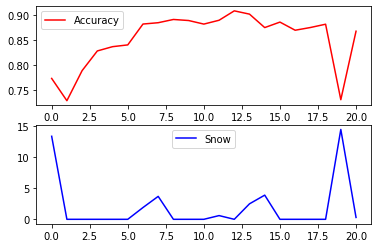

In [24]:
#Draw a Plot of Daily Accuracy and Snow Affect for Rail (Train)
fig, ax = plt.subplots(nrows=2,ncols=1)
plt.subplot(2,1,1)
plt.plot(snow_affect_rail['Daily Accuracy'], 'r', label='Accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(snow_affect_rail ['Snow'], 'b', label='Snow')
plt.legend()
plt.savefig('Graph/Daily Accuracy and Snow Affect for Rail (Train).png', dpi=300, bbox_inches='tight')

In [15]:
#Find the Snow Affect in Certain Dates for Commuter Rail 
snow_affect_com=['']
jan_snow_com = Com_Rail_OTP_date[(Com_Rail_OTP_date['Date'] >= '2018-01-04') & (Com_Rail_OTP_date['Date'] <= '2018-01-09')]
feb_snow_com = Com_Rail_OTP_date[(Com_Rail_OTP_date['Date'] >= '2018-02-17') & (Com_Rail_OTP_date['Date'] <= '2018-02-21')]
mar_snow_com = Com_Rail_OTP_date[(Com_Rail_OTP_date['Date'] >= '2018-03-05') & (Com_Rail_OTP_date['Date'] <= '2018-03-14')]
snow_affect_com=jan_snow_com.append(feb_snow_com)
snow_affect_com=snow_affect_com.append(mar_snow_com)
snow_affect_com =snow_affect_com.sort_values("Date",ascending=True).reset_index()
del snow_affect_com ['index']
mean_com_snow=snow_affect_com['Daily Accuracy'].mean()
#snow_affect_com.head(400)

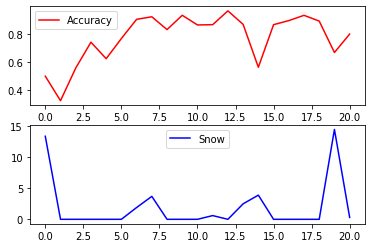

In [23]:
#Draw a Plot of Daily Accuracy and Snow Affect for  Commuter Rail
fig, ax = plt.subplots(nrows=2,ncols=1)
plt.subplot(2,1,1)
plt.plot(snow_affect_com['Daily Accuracy'], 'r', label='Accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(snow_affect_com ['Snow'], 'b', label='Snow')
plt.legend()
plt.savefig('Graph/Daily Accuracy and Snow Affect for  Commuter Rail.png', dpi=300, bbox_inches='tight')

In [17]:
#Find the Snow Affect in Certain Dates for Bus 
snow_affect_bus=['']
jan_snow_bus = Bus_OTP_date[(Bus_OTP_date['Date'] >= '2018-01-04') & (Bus_OTP_date['Date'] <= '2018-01-09')]
feb_snow_bus = Bus_OTP_date[(Bus_OTP_date['Date'] >= '2018-02-17') & (Bus_OTP_date['Date'] <= '2018-02-21')]
mar_snow_bus = Bus_OTP_date[(Bus_OTP_date['Date'] >= '2018-03-05') & (Bus_OTP_date['Date'] <= '2018-03-14')]
snow_affect_bus=jan_snow_bus.append(feb_snow_bus)
snow_affect_bus=snow_affect_bus.append(mar_snow_bus)
snow_affect_bus =snow_affect_bus.sort_values("Date",ascending=True).reset_index()
del snow_affect_bus ['index']
mean_bus_snow=snow_affect_bus['Daily Accuracy'].mean() 
#snow_affect_bus.head(40)

The correlation between both factors is 0.38


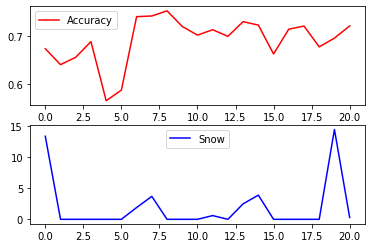

In [18]:
#Draw a Plot of Daily Accuracy and Snow Affect for Bus 
fig, ax = plt.subplots(nrows=2,ncols=1)
plt.subplot(2,1,1)
plt.plot(snow_affect_bus['Daily Accuracy'], 'r', label='Accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(snow_affect_bus ['Snow'], 'b', label='Snow')
correlation = st.pearsonr(snow_affect_bus['Daily Accuracy'],snow_affect_bus ['Temperature'])
plt.legend()
plt.savefig('Graph/Daily Accuracy and Snow Affect for Bus.png', dpi=300, bbox_inches='tight')
print(f"The correlation between both factors is {round(correlation[0],2)}")

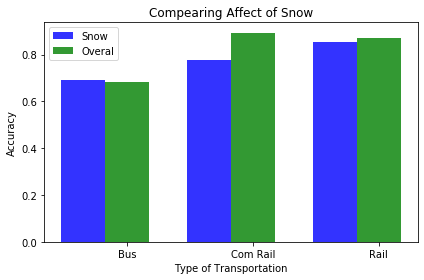

In [19]:
# data to plot
n_groups = 3
means_snow = (mean_bus_snow, mean_com_snow, mean_rail_snow)
means_whole_year = (mean_bus,mean_com_rail,mean_rail)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_snow, bar_width,
alpha=opacity,
color='b',
label='Snow')

rects2 = plt.bar(index + bar_width, means_whole_year, bar_width,
alpha=opacity,
color='g',
label='Overal')

plt.xlabel('Type of Transportation')
plt.ylabel('Accuracy')
plt.title('Compearing Affect of Snow')
plt.xticks(index + bar_width, ('Bus', 'Com Rail', 'Rail'))
plt.legend()

plt.tight_layout()
plt.savefig('Graph/Compearing Affect of Snow Each Type.png', dpi=300, bbox_inches='tight')
plt.show()

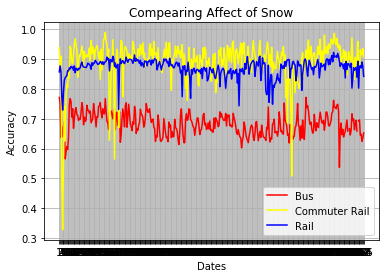

In [20]:
# Plot the world average as a line chart
#collect bus data
bus_data = Bus_OTP_date['Daily Accuracy'] 
com_rail = Com_Rail_OTP_date['Daily Accuracy']
rail=Rail_OTP_date['Daily Accuracy']
days = range(1,366)

# Plot different line chart
plt.plot(days,bus_data, color="Red", label="Bus")
plt.plot(days,com_rail, color="Yellow", label="Commuter Rail")
plt.plot(days,rail, color="Blue", label="Rail")
plt.title('Compearing Affect of Snow')
plt.xlabel('Dates')
plt.ylabel('Accuracy')
plt.xticks(days)
plt.legend(loc="best")
plt.grid()
plt.savefig('Graph/Compearing Affect of Snow Whole Year.png', dpi=300, bbox_inches='tight')
plt.show()

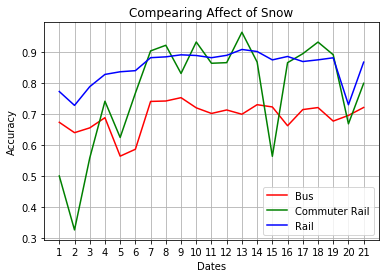

In [21]:
# Plot the world average as a line chart
#collect bus data
bus_data = snow_affect_bus['Daily Accuracy'] 
com_rail = snow_affect_com['Daily Accuracy']
rail=snow_affect_rail['Daily Accuracy']
days = range(1,22)

# Plot different line chart
plt.plot(days,bus_data, color="Red", label="Bus")
plt.plot(days,com_rail, color="Green", label="Commuter Rail")
plt.plot(days,rail, color="Blue", label="Rail")
plt.xticks(days)
plt.title('Compearing Affect of Snow')
plt.xlabel('Dates')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.savefig('Graph/Compearing Affect of Snow.png', dpi=300, bbox_inches='tight')
plt.show()
